   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27       V28    Amount  C

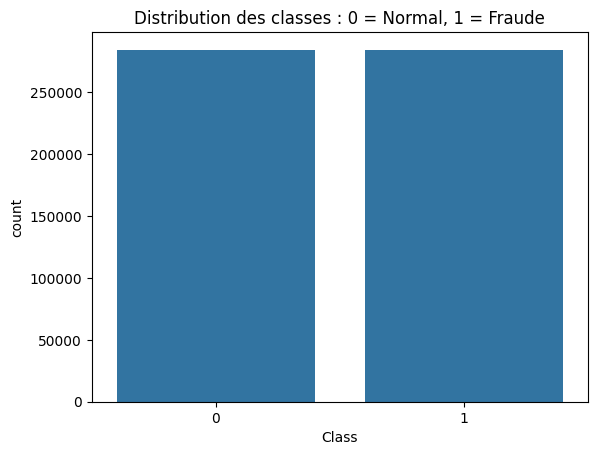

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_csv("creditcard_2023.csv")

# Aperçu du dataset
print(df.head())
print(df.info())
print(df['Class'].value_counts(normalize=True))

# Visualisation de la distribution
sns.countplot(x='Class', data=df)
plt.title('Distribution des classes : 0 = Normal, 1 = Fraude')
plt.show()


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Séparation X et y
X = df.drop(['Class'], axis=1)
y = df['Class']

# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# SMOTE pour équilibrer
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_scaled, y)

# Split 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)


In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraînement
history = model.fit(X_train, y_train, epochs=20, batch_size=2048, validation_split=0.2)


Epoch 1/20


c:\Users\INGRID\OneDrive\Desktop\ECE DOC\MACHINE LEARNING\fraude-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8596 - loss: 0.3208 - val_accuracy: 0.9920 - val_loss: 0.0242
Epoch 2/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9896 - loss: 0.0330 - val_accuracy: 0.9968 - val_loss: 0.0097
Epoch 3/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9948 - loss: 0.0166 - val_accuracy: 0.9982 - val_loss: 0.0061
Epoch 4/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9967 - loss: 0.0111 - val_accuracy: 0.9987 - val_loss: 0.0046
Epoch 5/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9976 - loss: 0.0085 - val_accuracy: 0.9989 - val_loss: 0.0040
Epoch 6/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9980 - loss: 0.0075 - val_accuracy: 0.9991 - val_loss: 0.0034
Epoch 7/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9984 - loss: 0.0064 - val_accuracy: 0.9993 - val_loss: 0.0030
Epoch 8/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9985 - loss: 0.0061 - val_accuracy: 0.9992 - val_

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 4s 979us/step
[[56833    30]
 [   32 56831]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 3s 877us/step
ROC-AUC Score: 0.9999607345302763
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 3s 859us/step


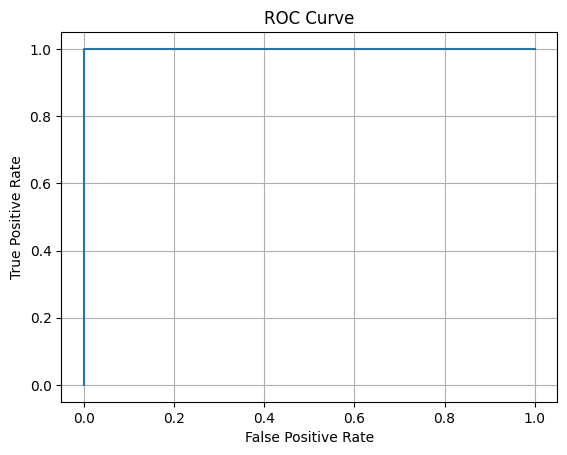

In [18]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

y_pred = (model.predict(X_test) > 0.5).astype(int)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, model.predict(X_test)))

# ROC curve
fpr, tpr, _ = roc_curve(y_test, model.predict(X_test))
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.show()


In [19]:
import keras_tuner as kt

def build_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int('units1', 32, 128, step=32), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(hp.Float('dropout1', 0.1, 0.5, step=0.1)))
    model.add(Dense(hp.Int('units2', 16, 64, step=16), activation='relu'))
    model.add(Dropout(hp.Float('dropout2', 0.1, 0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

tuner = kt.RandomSearch(
    build_model, objective='val_accuracy', max_trials=3, executions_per_trial=2,
    directory='tuning', project_name='fraude_nn'
)

tuner.search(X_train, y_train, epochs=5, validation_split=0.2)


Reloading Tuner from tuning\fraude_nn\tuner0.json


C:\Users\INGRID\AppData\Local\Temp\ipykernel_25320\1965935188.py:6: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test[:10])


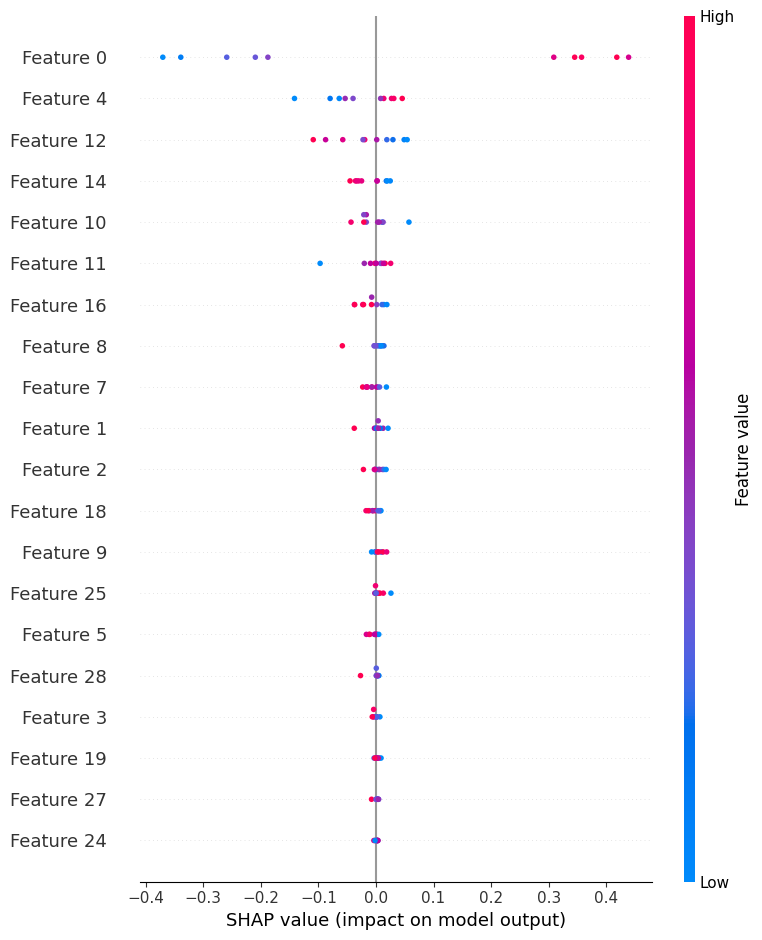

In [20]:
import shap

explainer = shap.Explainer(model, X_train[:100])
shap_values = explainer(X_test[:10])

shap.summary_plot(shap_values, X_test[:10])


In [21]:
y_pred_proba = model.predict(X_test)


3554/3554 ━━━━━━━━━━━━━━━━━━━━ 3s 902us/step


In [22]:
y_pred = (y_pred_proba > 0.5).astype(int)


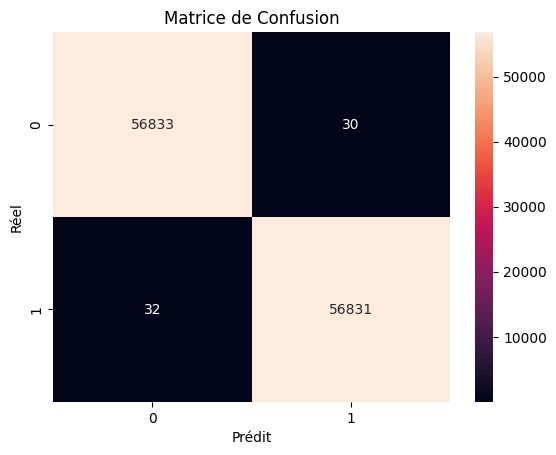

ROC AUC: 0.9999607345302763
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [23]:
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de Confusion")
plt.show()

# ROC AUC
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))
print(classification_report(y_test, y_pred))
